#**Bangkit Final Project: Student Depression Classification with Machine Learning**

Repository :
https://github.com/AgilS121/Capstone-HealMentor

##Import Libraries

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

##Preparation Data

In [39]:
df = pd.read_csv("/content/drive/MyDrive/Capstone/Student Mental health.csv")
df.head(5)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [40]:
new_columns = ['Time','Gender','Age','Major','Year','CGPA','Marriage','Depression','Anxiety','Panic','Treatment']
df.columns = new_columns
df.head()

,Time,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [41]:
df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()

Time          0
Gender        0
Age           0
Major         0
Year          0
CGPA          0
Marriage      0
Depression    0
Anxiety       0
Panic         0
Treatment     0
dtype: int64

## Data preprocessing

* Clean the data
* Turn categorial data into numerical data
* Normalize the data

In [42]:
cols = ['Marriage','Depression','Panic','Anxiety','Treatment']

def check(x):
    if x == 'Yes':
        return 1
    else:
        return 0

for i in cols:
    df[i] = df[i].apply(lambda x:1 if x =='Yes' else 0)

In [43]:
df['Year']=df['Year'].apply(lambda x: int(x[-1:])) #Turn the string to int
df

,Time,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,1,3.50 - 4.00,0,0,1,0,0
97,13/07/2020 21:21:42,Male,18.0,Engineering,2,3.00 - 3.49,0,1,1,0,0
98,13/07/2020 21:22:56,Female,19.0,Nursing,3,3.50 - 4.00,1,1,0,1,0
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,4,3.50 - 4.00,0,0,0,0,0


In [44]:
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [45]:
df['CGPA'].value_counts().sort_values()

def change_cgpa(x):
    if (x == '3.50 - 4.00' or x == '3.50 - 4.00 '):
        x = 5
        return x
    elif x=='3.00 - 3.49' :
        x = 4
        return x
    elif x == '2.50 - 2.99':
        x = 3
        return x
    elif x== '2.00 - 2.49':
        x = 2
        return x
    else:
        x=1
        return x

df['CGPA']=df['CGPA'].apply(lambda x:change_cgpa(x))

In [46]:
df.head()

,Time,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,4,0,1,0,1,0
1,8/7/2020 12:04,Male,21.0,Islamic education,2,4,0,0,1,0,0
2,8/7/2020 12:05,Male,19.0,BIT,1,4,0,1,1,1,0
3,8/7/2020 12:06,Female,22.0,Laws,3,4,1,1,0,0,0
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,4,0,0,0,0,0


In [47]:
# 0 for female, 1 for male
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Female' else 1)

In [48]:
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()
df['Major'] = le.fit_transform(df['Major'])
# The Major dataset skiped over the '42th entry', so can't use df['Major'] = pd.DataFrame(le.fit_transform(df['Major']))

In [49]:
df.drop('Time',axis=1,inplace=True)

In [50]:
df.head()

,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,0,18.0,17,1,4,0,1,0,1,0
1,1,21.0,25,2,4,0,0,1,0,0
2,1,19.0,4,1,4,0,1,1,1,0
3,0,22.0,33,3,4,1,1,0,0,0
4,1,23.0,37,4,4,0,0,0,0,0


###Split Dataset

In [51]:
# Splitting the data
from sklearn.model_selection import train_test_split

X=df.drop(['Depression'],axis=1).values
y=df['Depression'].values

X.shape,y.shape

((100, 9), (100,))

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 9), (20, 9), (80,), (20,))

In [53]:
# Standardize the data to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm_X_train = scaler.fit_transform(X_train).astype(np.int)
norm_X_test = scaler.transform(X_test).astype(np.int)

<ipython-input-53-6fa4f52e535a>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  norm_X_train = scaler.fit_transform(X_train).astype(np.int)
<ipython-input-53-6fa4f52e535a>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprec

##Unnormalized Model

In [54]:
len(X_train),len(norm_X_train)
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential

###Define Model with Basic CNN

In [55]:
# baseline model
model = Sequential([
    tf.keras.layers.Input(shape=(9,)),
    Dense(9),
    Dense(18,activation='relu'),
    Dense(9,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.summary()
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001) #Default
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 9)                 90        
                                                                 
 dense_10 (Dense)            (None, 18)                180       
                                                                 
 dense_11 (Dense)            (None, 9)                 171       
                                                                 
 dense_12 (Dense)            (None, 1)                 10        
                                                                 
Total params: 451 (1.76 KB)
Trainable params: 451 (1.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###Training Model

In [56]:
history = model.fit(X_train,y_train,validation_data=[X_test,y_test],
          epochs = 50)

Epoch 1/50
3/3 [==============================] - 2s 153ms/step - loss: 1.3807 - accuracy: 0.3500 - val_loss: 1.1205 - val_accuracy: 0.3500
Epoch 2/50
3/3 [==============================] - 0s 34ms/step - loss: 1.1203 - accuracy: 0.3375 - val_loss: 0.9056 - val_accuracy: 0.3500
Epoch 3/50
3/3 [==============================] - 0s 32ms/step - loss: 0.9804 - accuracy: 0.3125 - val_loss: 0.7388 - val_accuracy: 0.5500
Epoch 4/50
3/3 [==============================] - 0s 34ms/step - loss: 0.8884 - accuracy: 0.3750 - val_loss: 0.6426 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 0s 27ms/step - loss: 0.8363 - accuracy: 0.4500 - val_loss: 0.5947 - val_accuracy: 0.6500
Epoch 6/50
3/3 [==============================] - 0s 34ms/step - loss: 0.7909 - accuracy: 0.5125 - val_loss: 0.5843 - val_accuracy: 0.6000
Epoch 7/50
3/3 [==============================] - 0s 31ms/step - loss: 0.7505 - accuracy: 0.6125 - val_loss: 0.5941 - val_accuracy: 0.7000
Epoch 8/50
3/3 [==========

In [57]:
  def plot_histories(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('acc')

    plt.subplot(1,2,1)
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('loss')


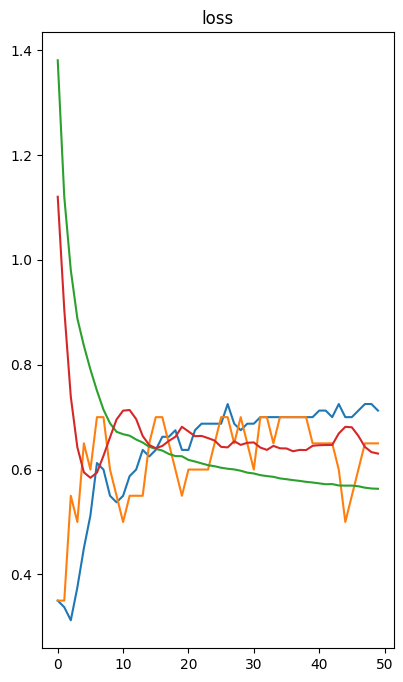

In [58]:
plot_histories(history)

## Evaluating the baseline model

In [59]:
from sklearn.metrics import classification_report, accuracy_score,f1_score,recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

def evaluations(y_test,pred_labels):
    acc = accuracy_score(y_test,pred_labels)
    prec = precision_score(y_test,pred_labels)
    f1 = f1_score(y_test,pred_labels)
    recall = recall_score(y_test,pred_labels)
    print(f'accuracy: {acc:.2f}, precision: {prec:.2f}, f1 score: {f1:.2f}, recall: {recall:.2f}')

In [60]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.6305 - accuracy: 0.6500


[0.630512535572052, 0.6499999761581421]

In [61]:
predictions = model.predict(norm_X_test)
pred_labels = [int(round(x[0])) for x in predictions]

evaluations(y_test,pred_labels)

1/1 [==============================] - 0s 71ms/step
accuracy: 0.65, precision: 0.25, f1 score: 0.22, recall: 0.20


Text(0.5, 1.0, 'Confusion matrix of unnormalized model')

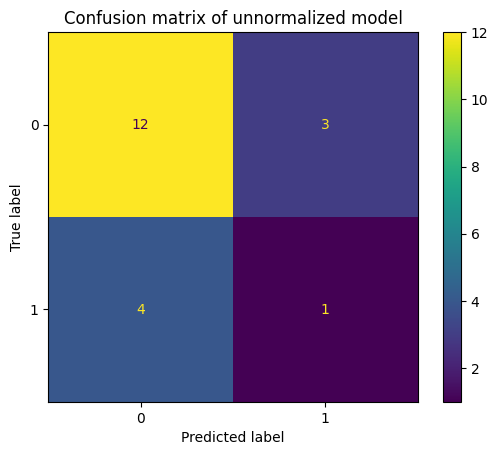

In [62]:
cm = confusion_matrix(y_test,pred_labels)
cm
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion matrix of unnormalized model')

In [63]:
print(classification_report(y_test,pred_labels))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.25      0.20      0.22         5

    accuracy                           0.65        20
   macro avg       0.50      0.50      0.50        20
weighted avg       0.62      0.65      0.64        20



## New Normalized Model

In [64]:
# baseline model
model1 = Sequential([
    Dense(9),
    Dense(18,activation='relu'), #18 neurons, ReLU activation function
    Dense(18,activation='relu'), #18 neurons, ReLU activation function
    Dense(9,activation='relu'), #9 neurons, ReLU activation function
    Dense(1,activation='sigmoid') #1 output neuron, sigmoid activation function for binary classification
])

opt = tf.keras.optimizers.RMSprop(learning_rate=0.001) #Default
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

###Training Model

In [65]:
history1 = model1.fit(norm_X_train,y_train,validation_data=[norm_X_test,y_test],
          epochs = 50)

Epoch 1/50
3/3 [==============================] - 1s 110ms/step - loss: 0.7768 - accuracy: 0.4250 - val_loss: 0.8211 - val_accuracy: 0.3000
Epoch 2/50
3/3 [==============================] - 0s 17ms/step - loss: 0.7593 - accuracy: 0.4250 - val_loss: 0.7962 - val_accuracy: 0.3000
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 0.7436 - accuracy: 0.4250 - val_loss: 0.7761 - val_accuracy: 0.3000
Epoch 4/50
3/3 [==============================] - 0s 18ms/step - loss: 0.7303 - accuracy: 0.4250 - val_loss: 0.7605 - val_accuracy: 0.3000
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 0.7194 - accuracy: 0.4250 - val_loss: 0.7471 - val_accuracy: 0.3000
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 0.7112 - accuracy: 0.4250 - val_loss: 0.7354 - val_accuracy: 0.3000
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 0.7037 - accuracy: 0.4250 - val_loss: 0.7256 - val_accuracy: 0.3000
Epoch 8/50
3/3 [==========

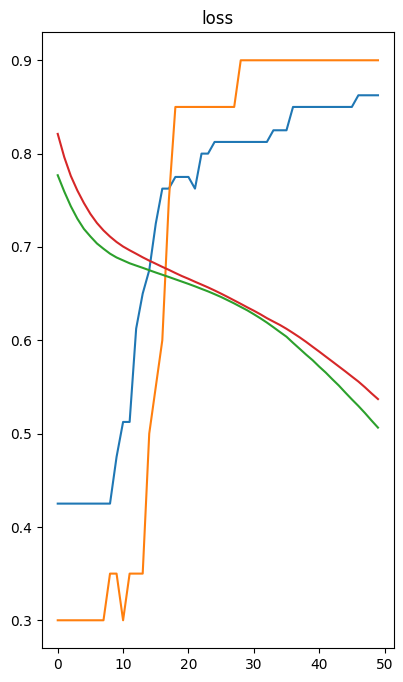

In [66]:
plot_histories(history1)

In [67]:
model1.evaluate(norm_X_test,y_test)

1/1 [==============================] - 0s 28ms/step - loss: 0.5370 - accuracy: 0.9000


[0.5370010137557983, 0.8999999761581421]

In [68]:
predictions = model1.predict(norm_X_test)
pred_labels = [int(round(x[0])) for x in predictions]

evaluations(y_test,pred_labels)

1/1 [==============================] - 0s 70ms/step
accuracy: 0.90, precision: 1.00, f1 score: 0.75, recall: 0.60


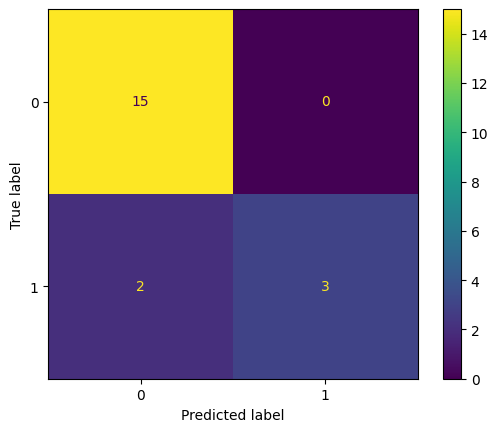

In [69]:
cm = confusion_matrix(y_test,pred_labels)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [70]:
print(classification_report(y_test,pred_labels))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.60      0.75         5

    accuracy                           0.90        20
   macro avg       0.94      0.80      0.84        20
weighted avg       0.91      0.90      0.89        20



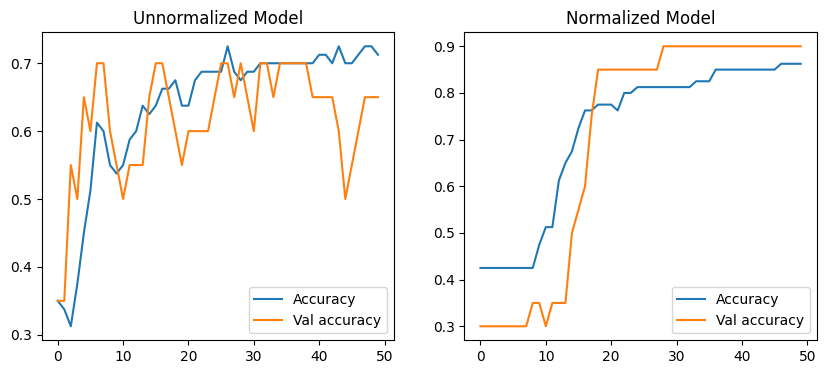

In [71]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Unnormalized Model')
plt.legend(['Accuracy','Val accuracy'])

plt.subplot(1,2,2)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Normalized Model')
plt.legend(['Accuracy','Val accuracy'])

<Axes: >

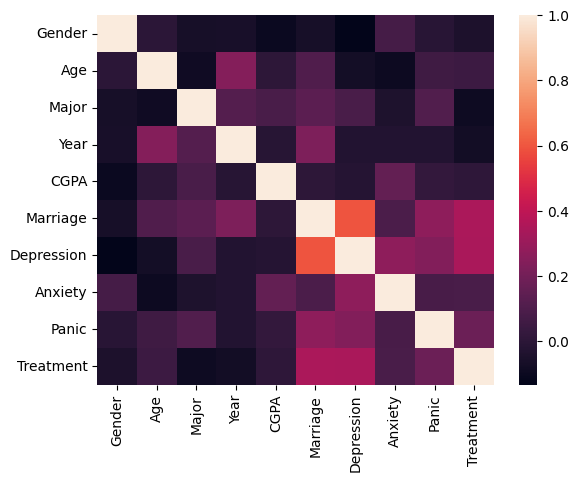

In [72]:
sns.heatmap(df.corr())

Text(0.5, 1.0, "Features' correlation to the Depression")

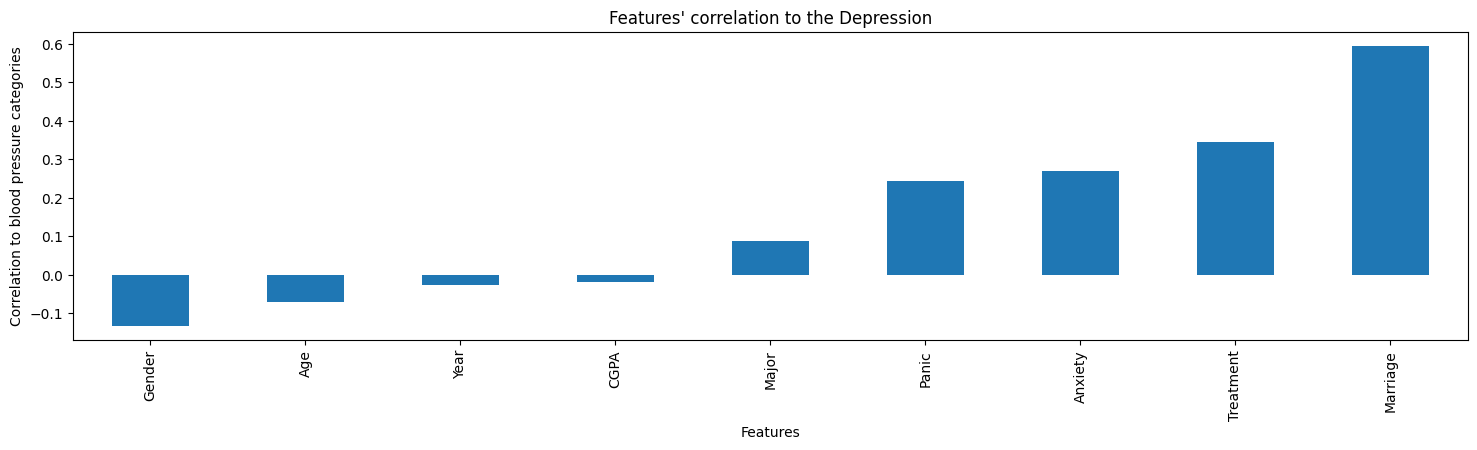

In [73]:
plt.figure(figsize=(18,4))
df.corr()['Depression'].sort_values(ascending = True)[:-1].plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation to blood pressure categories')
plt.title('Features\' correlation to the Depression')

In [74]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Conclusion

* The **Normalized model** performed better than the **unnormalized model** with accuracy of `90%`.
* `Marriage` and `Treatments` were the two features that had the most influence for predicting depression among students.
* The heatmap shows a very **strong correlation** between Depression and Marriage.